Shape citra 1 :  (704, 720, 3)
Shape citra 1 :  (752, 564, 3)


Text(0.5, 1.0, 'Citra 2')

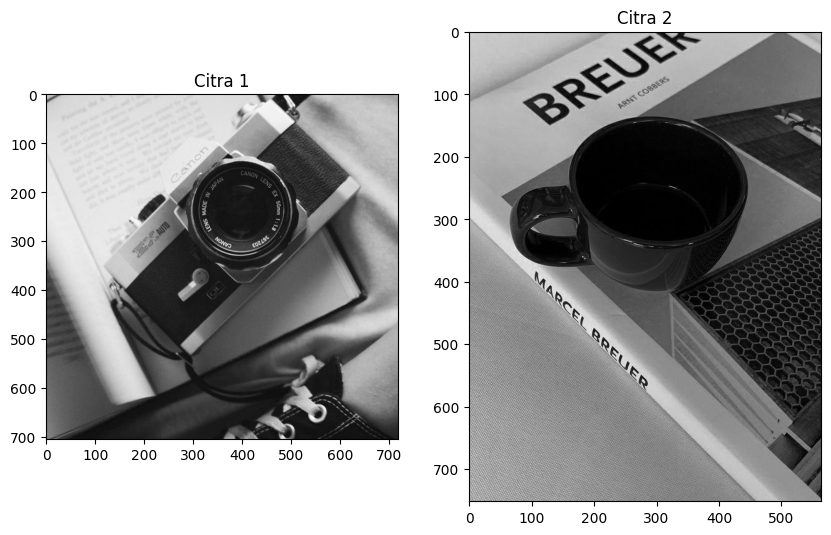

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

from skimage import data
from skimage.io import imread
from skimage.color import rgb2gray 
import numpy as np

# Baris ini membaca dua citra dengan menggunakan fungsi imread dari skimage.io. Citra pertama dibaca dari file "kopii.jpg", dan citra kedua dibaca dari file "kopiii.jpg".
citra1 = imread(fname="kopii.jpg")
citra2 = imread(fname="kopiii.jpg")

# Baris ini mencetak bentuk (shape) dari citra pertama dan citra kedua. Bentuk citra menunjukkan dimensi citra dalam bentuk (tinggi, lebar, jumlah saluran warna).
print('Shape citra 1 : ', citra1.shape)
print('Shape citra 1 : ', citra2.shape)

fig, axes = plt.subplots(1, 2, figsize=(10, 10)) # Baris ini membuat subplot dengan ukuran 1x2 dan mengatur ukuran figure menjadi 10x10. Objek axes direpresentasikan oleh array axes, sedangkan fig merupakan objek utama yang akan menampung subplot.
ax = axes.ravel() # ax merupakan versi array 1 dimensi dari axes agar lebih mudah mengakses objek sumbu (axes) individu.

# Pada subplot ini, citra pertama (citra1) ditampilkan pada sumbu pertama dengan colormap 'gray' dan diberikan judul "Citra 1". Citra kedua (citra2) ditampilkan pada sumbu kedua dengan colormap 'gray' dan diberikan judul "Citra 2".
ax[0].imshow(citra1, cmap = 'gray')
ax[0].set_title("Citra 1")
ax[1].imshow(citra2, cmap = 'gray')
ax[1].set_title("Citra 2")

In [3]:
# Pada kedua baris ini, dilakukan penyalinan citra pertama (citra1) dan citra kedua (citra2) ke variabel copyCitra1 dan copyCitra2. Penyalinan dilakukan menggunakan metode copy() agar citra asli tidak terpengaruh oleh proses pengolahan selanjutnya.
copyCitra1 = citra1.copy()
copyCitra2 = citra2.copy()

# Baris ini memeriksa jumlah dimensi dari citra pertama (copyCitra1). Jika citra tersebut memiliki 2 dimensi (grayscale), maka nilai m1 dan n1 akan diambil dari bentuk (shape) citra tersebut, yaitu tinggi dan lebar citra. Jika citra tersebut memiliki 3 dimensi (RGB), maka nilai m1, n1, dan _ (saluran warna) akan diambil dari bentuk citra. Selanjutnya, dibuat array kosong output1 dengan ukuran yang sesuai untuk menyimpan hasil pengolahan citra.
if copyCitra1.ndim == 2:
    m1, n1 = copyCitra1.shape
else:
    m1, n1, _ = copyCitra1.shape
output1 = np.empty([m1, n1])

# Baris ini melakukan hal serupa dengan citra kedua (copyCitra2). Jumlah dimensi citra kedua diperiksa, dan nilai m2 dan n2 ditentukan sesuai dengan bentuk citra. Array kosong output2 dibuat untuk menampung hasil pengolahan citra kedua.
if copyCitra2.ndim == 2:
    m2, n2 = copyCitra2.shape
else:
    m2, n2, _ = copyCitra2.shape
output2 = np.empty([m2, n2])

# Baris ini mencetak informasi tentang bentuk (shape) citra pertama dan kedua, serta nilai m1, n1, m2, dan n2 yang merepresentasikan tinggi dan lebar citra. Hal ini berguna untuk memverifikasi dimensi dan ukuran citra yang akan diproses, serta memastikan array output telah dibuat dengan ukuran yang tepat.
print('Shape copy citra 1 : ', copyCitra1.shape)
print('Shape output citra 1 : ', output1.shape)

print('m1 : ',m1)
print('n1 : ',n1)
print()

print('Shape copy citra 2 : ', copyCitra2.shape)
print('Shape output citra 3 : ', output2.shape)
print('m2 : ',m2)
print('n2 : ',n2)
print()

Shape copy citra 1 :  (704, 720, 3)
Shape output citra 1 :  (704, 720)
m1 :  704
n1 :  720

Shape copy citra 2 :  (752, 564, 3)
Shape output citra 3 :  (752, 564)
m2 :  752
n2 :  564



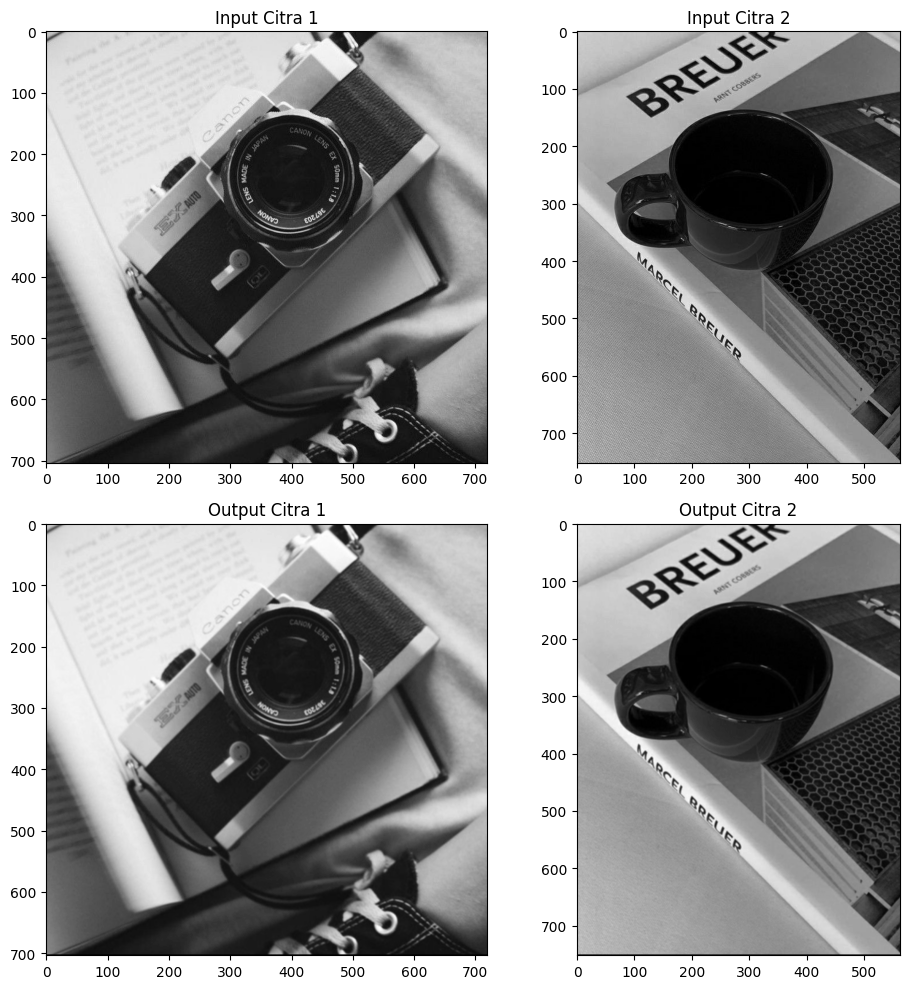

In [20]:
import numpy as np # memanggil library numpy
import matplotlib.pyplot as plt # memanggil library matplotlib.pyplot

# Pada kedua baris ini, citra pertama (citra1) dan citra kedua (citra2) disalin ke variabel copyCitra1 dan copyCitra2. Kemudian, tipe data citra diubah menjadi float menggunakan metode astype(float). Perubahan tipe data ini diperlukan untuk melakukan operasi pengolahan citra berikutnya.
copyCitra1 = citra1.copy().astype(float)
copyCitra2 = citra2.copy().astype(float)

# Baris ini mengambil informasi tentang jumlah dimensi citra pertama (copyCitra1) dan menyimpannya dalam variabel dimensi1. Selanjutnya, variabel m1 dan n1 diinisialisasi dengan tinggi dan lebar citra pertama menggunakan metode shape[:2]. Kemudian, array kosong output1 dengan ukuran yang sesuai dibuat untuk menyimpan hasil pengolahan citra.
dimensi1 = copyCitra1.ndim
m1, n1 = copyCitra1.shape[:2]
output1 = np.empty((m1, n1), dtype=float)

# Pada blok ini, dilakukan iterasi pada setiap piksel di dalam citra pertama (copyCitra1) kecuali pada tepi citra. Piksel tersebut digunakan sebagai pusat filter rata-rata 3x3. Setiap piksel di sekitar pusat diambil, dan nilai rata-ratanya dihitung menggunakan fungsi np.sum(). Hasilnya kemudian dikalikan dengan skalar 1.0/9 (1 dibagi 9) dan disimpan pada array output1.
for baris in range(1, m1-1):
    for kolom in range(1, n1-1):
        a1 = baris
        b1 = kolom
        jumlah = np.sum([
            copyCitra1[a1-1, b1-1], copyCitra1[a1-1, b1], copyCitra1[a1-1, b1+1],
            copyCitra1[a1, b1-1], copyCitra1[a1, b1], copyCitra1[a1, b1+1],
            copyCitra1[a1+1, b1-1], copyCitra1[a1+1, b1], copyCitra1[a1+1, b1+1]
        ])
        output1[a1, b1] = (1.0/9) * jumlah

# Langkah-langkah serupa dilakukan pada citra kedua (copyCitra2). Informasi tentang jumlah dimensi citra kedua disimpan dalam variabel dimensi2. Variabel m2 dan n2 diinisialisasi dengan tinggi dan lebar citra kedua. Array kosong output2 dengan ukuran yang sesuai juga dibuat untuk menyimpan hasil pengolahan citra kedua.
dimensi2 = copyCitra2.ndim
m2, n2 = copyCitra2.shape[:2]
output2 = np.empty((m2, n2), dtype=float)

# Pada blok ini, dilakukan iterasi pada setiap piksel di dalam citra kedua (copyCitra2) kecuali pada tepi citra. Piksel tersebut digunakan sebagai pusat filter rata-rata 3x3. Setiap piksel di sekitar pusat diambil, dan nilai rata-ratanya dihitung menggunakan fungsi np.sum(). Hasilnya kemudian dikalikan dengan skalar 1.0/9 (1 dibagi 9) dan disimpan pada array output2.
for baris1 in range(1, m2-1):
    for kolom1 in range(1, n2-1):
        a1 = baris1
        b1 = kolom1
        jumlah = np.sum([
            copyCitra2[a1-1, b1-1], copyCitra2[a1-1, b1], copyCitra2[a1-1, b1+1],
            copyCitra2[a1, b1-1], copyCitra2[a1, b1], copyCitra2[a1, b1+1],
            copyCitra2[a1+1, b1-1], copyCitra2[a1+1, b1], copyCitra2[a1+1, b1+1]
        ])
        output2[a1, b1] = (1.0/9) * jumlah

# Pada blok ini, dilakukan visualisasi citra-citra yang sudah diolah menggunakan matplotlib. Dilakukan pembuatan grid subplot dengan ukuran 2x2. Setiap citra ditampilkan dalam subplot yang sesuai menggunakan metode imshow(). Pada setiap subplot, juga ditambahkan judul dengan menggunakan set_title(). Terakhir, dengan menggunakan plt.tight_layout() dilakukan penyesuaian tata letak subplot agar lebih rapi. Akhirnya, citra-citra ditampilkan dengan memanggil plt.show().
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
ax = axes.ravel()

ax[0].imshow(citra1, cmap='gray') # untuk menampilkan citra1
ax[0].set_title("Input Citra 1") # judul untuk input citra1

ax[1].imshow(citra2, cmap='gray') # untuk menampilkan citra2
ax[1].set_title("Input Citra 2") # judul untuk input citra2

ax[2].imshow(output1, cmap='gray') # untuk menampilkan output1
ax[2].set_title("Output Citra 1") # judul untuk output citra1

ax[3].imshow(output2, cmap='gray') # untuk menampilkan output2
ax[3].set_title("Output Citra 2") # judul untuk output citra2

plt.tight_layout() # untuk merapikan tata letak
plt.show() # untuk menampilkan output